In [1]:
#import platform
#print (platform.python_version())
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score
from sklearn import linear_model


In [28]:
with open('project_data_2010.pkl', 'rb') as f:
    data = pickle.load(f)    
# data.security_id.unique() 
df = data.head(10)
#df.to_csv("test",sep=',')
df

,security_id,alpha0,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,...,alpha291,alpha292,alpha293,alpha294,alpha295,alpha296,alpha297,alpha298,alpha299,depCC
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0,0.101604,0.003105,-0.787087,-0.953687,-1.510916,0.520251,0.442077,-0.724332,-1.350528,...,1.196510,-0.159166,0.477173,-0.261669,-0.701458,-0.163532,1.106215,0.275853,0.000000,0.002870
2010-01-04,1,-1.575332,-0.619544,0.101361,0.981232,1.654688,-0.290842,-0.149869,0.274417,0.491836,...,1.457452,0.760317,0.603711,-2.083432,-1.012611,1.355369,0.902544,-0.360890,0.292062,0.002334
2010-01-04,2,0.056177,0.435130,0.034189,-0.613511,0.098615,0.535061,0.116817,0.000000,0.932283,...,0.850646,0.393288,-0.279554,0.000000,0.481157,0.733696,-1.185695,0.000000,0.844084,0.003903
2010-01-04,4,0.768025,-1.013717,-1.521912,0.739405,1.279322,-0.395036,1.154687,0.000000,0.494757,...,1.819627,0.518778,1.650474,0.000000,0.346424,-0.902989,0.000000,0.000000,0.370923,-0.006058
2010-01-04,6,-0.420122,1.802942,-0.137199,-1.304200,0.000000,0.350362,0.735328,-0.610428,0.377589,...,0.181410,0.001994,-1.193179,0.189614,-0.002404,0.459853,0.101040,0.000000,0.000000,-0.000422
2010-01-04,5,0.194793,-2.058594,-0.077854,-0.765985,1.215348,1.707379,-0.138440,0.470220,-0.108799,...,-0.225301,0.349633,-1.249129,0.031616,0.395379,1.033912,1.869960,-0.631082,-0.195695,0.005880
2010-01-04,8,0.924962,1.888740,-0.078804,-0.887483,0.000000,1.492175,0.027937,-0.259881,0.095977,...,0.214105,0.000000,0.000000,-1.264566,0.466605,-0.009803,0.011187,-1.280097,0.000000,0.010589
2010-01-04,7,0.979322,1.643717,0.569879,-0.790584,-0.194423,1.230758,-0.921006,0.708830,0.696284,...,0.008734,0.848529,-0.903651,0.000000,-0.768360,1.285239,0.279529,0.000000,0.370923,-0.000323
2010-01-04,9,-0.513395,0.342831,-0.596123,-1.085779,0.259632,0.832139,-0.274767,-0.078766,0.942950,...,1.001726,-0.072215,-1.277325,2.630759,0.399447,-0.854947,0.545512,0.000000,0.000000,0.004242


In [3]:
data.shape

(104667, 302)

In [4]:
data.columns

Index(['security_id', 'alpha0', 'alpha1', 'alpha2', 'alpha3', 'alpha4',
       'alpha5', 'alpha6', 'alpha7', 'alpha8',
       ...
       'alpha291', 'alpha292', 'alpha293', 'alpha294', 'alpha295', 'alpha296',
       'alpha297', 'alpha298', 'alpha299', 'depCC'],
      dtype='object', length=302)

In [5]:
import scipy.stats as stats
all_features = data.columns[1:-1]
for name in all_features:
    x = data.loc[:,name]
    u = np.unique(x)
    if len(u) > 2:
        m = np.nanmean(x)
        v = np.nanvar(x)
        s = stats.skew(x)
        k = stats.kurtosis(x)
        print(name, m, v, s, k, len(u))
    else:
        print (u)
        #print(name, 'binary', np.sum(x == u[0]) / len(x), np.sum(x == u[1]) / len(x), len(u))

alpha0 0.0283823010771 0.691381046829 -0.1548249264453889 1.8446345388701948 97070
alpha1 -0.00337734140146 1.00233753708 0.002977915443511728 -0.02120203474190241 104667
alpha2 -0.00710511867139 0.667748870792 0.35097450046335077 1.2113776427266574 91086
alpha3 0.015459191863 0.800444924301 -0.11172070878715244 0.10587142106355074 92240
alpha4 0.00785585205993 0.863944819065 -0.04919700687797748 0.15425129753640032 74660
alpha5 0.0353788195513 0.759528478123 -0.08630215591058105 1.5885624348383 67681
alpha6 -0.0551197638934 0.864003251823 -0.1548431772243478 1.6227729995821765 95548
alpha7 0.0142073452688 0.578986660055 0.33020780175399794 1.9141043891523228 68456
alpha8 -0.00899063218294 0.697022199067 0.027550069019674547 0.589579518633319 97764
alpha9 -0.00712734252937 0.689150808074 0.010291325064063297 1.9539107264327908 96869
alpha10 -0.0461902790188 0.722395789077 -0.16818211218674764 0.6367378887761435 97028
alpha11 0.0120071788354 0.618196060796 -0.012348919685397886 1.812575

alpha97 0.0282871021671 0.73899390053 0.36009699766369485 1.4447778368418875 95580
alpha98 -0.0105199453158 0.840531480971 0.010023527402830685 -0.6017183189478188 88438
alpha99 0.0317923266111 0.717460219859 0.4525792816249732 1.4788824959188123 96240
alpha100 0.000697825093981 0.996020639505 -0.007455836496140114 -0.028829152064976604 104667
alpha101 -0.0464072515225 0.923979314713 -0.004453405089547241 0.14413451738160665 96963
alpha102 0.0127008021522 0.833162002601 -0.015698319078359033 -0.18282600664021675 92494
alpha103 0.00417426733123 0.663748419018 -0.005013537464645123 0.8796060181110983 96983
alpha104 -0.0422850592061 0.82974930173 -0.08982925413871812 1.4572210018520844 96733
alpha105 0.0043753361888 0.767429567631 -0.08128302308744124 0.5052309202483554 81792
alpha106 0.264719967404 1.04457882461 -0.32711803053202565 0.7329930620800571 96376
alpha107 0.033022096734 0.781814723559 0.1537170878886769 1.0876147779167207 97037
alpha108 0.0042053564355 0.608436761641 -0.134967

alpha202 -0.0861278090445 0.762039654734 0.10682090343643445 0.637920840697157 97369
alpha203 -0.0559820664574 0.785949387375 0.5077512358370828 0.9168245370687402 95310
alpha204 -0.0229189909552 0.693720634589 0.23776726314108762 1.4377414009144536 87970
alpha205 0.0125598117996 0.732009956408 -0.1342414851124063 0.3270173848592042 95215
alpha206 -0.0798096265666 0.70579361146 0.03271188077656296 0.45659425341187854 97328
alpha207 0.261732603164 1.05024273962 -0.2743105711667362 0.5834629676565966 96690
alpha208 0.0317027902884 0.833632017518 -0.14477153072807733 -0.07034947843768524 91070
alpha209 -0.0437906745973 0.6525982398 0.37740068905556595 1.5435245627534186 96216
alpha210 0.00442251891601 0.789998759682 0.00481469692521261 0.4115690753290724 97322
alpha211 -0.0496215433478 0.703026859146 -0.10317592797751239 0.8494917625690461 95851
alpha212 0.0149213290474 0.680920430025 -0.1345805312913052 1.43305573197026 97619
alpha213 0.145263996923 0.696800323004 -0.22237867381883725 1.

In [6]:
ids = np.unique(data['security_id'])
#print(ids)

In [7]:
#pd.plotting.scatter_matrix(data.head(1), alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [8]:
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr

In [9]:
ALL_FEATURES=['alpha0','alpha1','alpha2','alpha3','alpha4','alpha5','alpha6','alpha7','alpha8','alpha9','alpha10','alpha11','alpha12','alpha13','alpha14','alpha15','alpha16','alpha17','alpha18','alpha19','alpha20','alpha21','alpha22','alpha23','alpha24','alpha25','alpha26','alpha27','alpha28','alpha29','alpha30','alpha31','alpha32','alpha33','alpha34','alpha35','alpha36','alpha37','alpha38','alpha39','alpha40','alpha41','alpha42','alpha43','alpha44','alpha45','alpha46','alpha47','alpha48','alpha49','alpha50','alpha51','alpha52','alpha54','alpha55','alpha56','alpha57','alpha58','alpha59','alpha60','alpha61','alpha62','alpha63','alpha64','alpha65','alpha66','alpha67','alpha68','alpha69','alpha70','alpha71','alpha72','alpha73','alpha74','alpha75','alpha76','alpha77','alpha78','alpha79','alpha80','alpha81','alpha82','alpha83','alpha84','alpha85','alpha86','alpha87','alpha88','alpha89','alpha90','alpha91','alpha92','alpha93','alpha94','alpha95','alpha96','alpha97','alpha98','alpha99','alpha100','alpha101','alpha102','alpha103','alpha104','alpha105','alpha106','alpha107','alpha108','alpha109','alpha110','alpha111','alpha112','alpha113','alpha114','alpha115','alpha116','alpha117','alpha118','alpha119','alpha120','alpha121','alpha122','alpha123','alpha124','alpha125','alpha126','alpha127','alpha128','alpha129','alpha130','alpha131','alpha132','alpha133','alpha134','alpha135','alpha136','alpha137','alpha138','alpha139','alpha140','alpha141','alpha142','alpha143','alpha144','alpha145','alpha146','alpha147','alpha148','alpha149','alpha150','alpha151','alpha152','alpha153','alpha154','alpha155','alpha156','alpha157','alpha158','alpha160','alpha161','alpha162','alpha163','alpha164','alpha165','alpha166','alpha167','alpha168','alpha169','alpha170','alpha171','alpha172','alpha173','alpha174','alpha175','alpha176','alpha177','alpha178','alpha179','alpha180','alpha181','alpha182','alpha183','alpha184','alpha185','alpha186','alpha187','alpha188','alpha189','alpha190','alpha191','alpha192','alpha193','alpha194','alpha195','alpha196','alpha197','alpha198','alpha199','alpha200','alpha201','alpha202','alpha203','alpha204','alpha205','alpha206','alpha207','alpha208','alpha209','alpha210','alpha211','alpha212','alpha213','alpha214','alpha215','alpha216','alpha217','alpha218','alpha219','alpha220','alpha221','alpha222','alpha223','alpha224','alpha225','alpha226','alpha227','alpha228','alpha229','alpha230','alpha231','alpha232','alpha233','alpha234','alpha235','alpha236','alpha237','alpha238','alpha239','alpha240','alpha241','alpha242','alpha243','alpha244','alpha245','alpha246','alpha247','alpha248','alpha249','alpha250','alpha251','alpha252','alpha253','alpha254','alpha255','alpha256','alpha257','alpha258','alpha259','alpha260','alpha261','alpha262','alpha263','alpha264','alpha265','alpha266','alpha267','alpha268','alpha269','alpha270','alpha271','alpha272','alpha273','alpha274','alpha275','alpha276','alpha277','alpha278','alpha279','alpha280','alpha281','alpha282','alpha283','alpha284','alpha285','alpha286','alpha287','alpha288','alpha289','alpha290','alpha291','alpha292','alpha293','alpha294','alpha295','alpha296','alpha297','alpha298','alpha299']
OUTPUT = 'depCC'

In [ ]:
#offset = int(len(data)*5.0/6.0)
#data = data[:offset]
data_Q = data[ALL_FEATURES]
data_y = data[OUTPUT]
# apply sigmoid transformation to a few spiky features
for col in ALL_FEATURES:
    data_Q[col] = data_Q[col].apply(lambda x: 1/(1+np.exp(-x)))

In [11]:
for col in ALL_FEATURES:
    res = pearsonr(data_y, data_Q[col])
    if res[1]<0.03: print(col, res)

alpha10 (0.0080765741434274656, 0.0089759899999580992)
alpha24 (-0.007280719038315564, 0.01849870964662044)
alpha38 (0.007287571538617317, 0.018388612625462493)
alpha40 (-0.0069774540189234124, 0.023985217251468148)
alpha57 (0.0067225255307562419, 0.029638445989295787)
alpha66 (0.0075056750919456133, 0.015171370758477493)
alpha89 (-0.0076853921599665913, 0.012904044202869816)
alpha103 (0.0084769743659747487, 0.0060971413012449694)
alpha105 (0.0071420220629333378, 0.020854471480329248)
alpha120 (-0.0079231357958138571, 0.010367504987728144)
alpha133 (0.0073429763648995066, 0.017519309485307846)
alpha146 (-0.0067405569557402968, 0.029203943016181608)
alpha185 (0.0089762508086297793, 0.0036837452391174468)
alpha187 (-0.0078884208402463345, 0.010707787227500041)
alpha188 (-0.0080286594807835194, 0.0093914634109254578)
alpha194 (-0.0068768268213762092, 0.026093997202328145)
alpha198 (0.0070565745332505283, 0.022432495839650735)
alpha200 (0.0067260682969034749, 0.029552639823562547)
alpha210

In [12]:
for col in ALL_FEATURES:
    res = kendalltau(data_y, data_Q[col])
    if res[1]<0.03: print(col, res)

alpha1 KendalltauResult(correlation=-0.0051805622206468668, pvalue=0.01193694408325909)
alpha10 KendalltauResult(correlation=0.0050865330410038816, pvalue=0.013799831965342018)
alpha29 KendalltauResult(correlation=0.0053361967027405156, pvalue=0.010150376542626982)
alpha40 KendalltauResult(correlation=-0.0061889409412748701, pvalue=0.0062973961470960717)
alpha41 KendalltauResult(correlation=0.0069257044232559654, pvalue=0.00079536753505164205)
alpha42 KendalltauResult(correlation=0.0061762261643525228, pvalue=0.0027770803499730904)
alpha66 KendalltauResult(correlation=0.006823463987323434, pvalue=0.0010123098544066733)
alpha70 KendalltauResult(correlation=-0.0055652210695090474, pvalue=0.0070527367014619645)
alpha77 KendalltauResult(correlation=0.0050790434579857571, pvalue=0.013894549074940008)
alpha81 KendalltauResult(correlation=-0.0068913907023943769, pvalue=0.00084450244143489321)
alpha83 KendalltauResult(correlation=0.0054289146159539814, pvalue=0.0085891047662281384)
alpha88 Ken

In [13]:
for col in ALL_FEATURES:
    res = spearmanr(data_y, data_Q[col])
    if res[1]<0.03: print(col, res)

alpha1 SpearmanrResult(correlation=-0.0077650797478133436, pvalue=0.011998508714308895)
alpha10 SpearmanrResult(correlation=0.0074405404852960506, pvalue=0.016075846283097276)
alpha29 SpearmanrResult(correlation=0.0078737965180469219, pvalue=0.010854085715470146)
alpha40 SpearmanrResult(correlation=-0.008424827242872102, pvalue=0.0064177053125198764)
alpha41 SpearmanrResult(correlation=0.010343099388125781, pvalue=0.00081904241926757169)
alpha42 SpearmanrResult(correlation=0.0091636783545501182, pvalue=0.0030299232892377842)
alpha66 SpearmanrResult(correlation=0.010078549326964465, pvalue=0.001111436997721264)
alpha70 SpearmanrResult(correlation=-0.0082896669525668494, pvalue=0.0073203088962951164)
alpha77 SpearmanrResult(correlation=0.0075602878014829865, pvalue=0.014447856989099709)
alpha81 SpearmanrResult(correlation=-0.010263969489459486, pvalue=0.00089799745866732102)
alpha83 SpearmanrResult(correlation=0.0080989985718303223, pvalue=0.0087872453752747635)
alpha88 SpearmanrResult(c

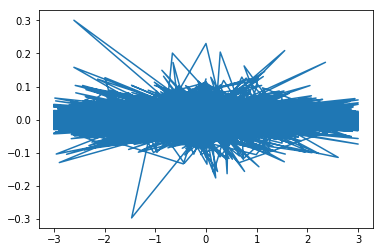

In [14]:
plt.plot(data['alpha285'], data['depCC'])
plt.show()

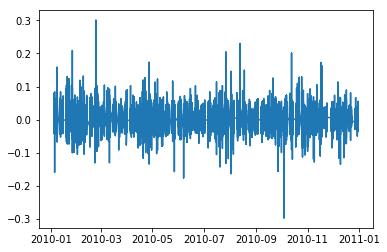

In [15]:
plt.plot(data['depCC'])
plt.show()

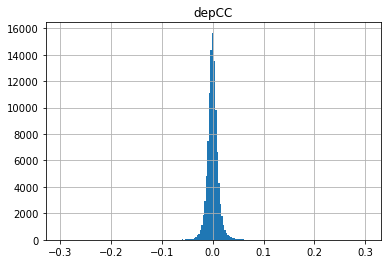

In [16]:
data.hist(column='depCC',bins=200)
plt.show()

In [17]:
#only narrow down the important features selected by Kendall and Spearmans'

In [18]:
Q_IMP_FEATURES=['alpha1','alpha10','alpha101','alpha103','alpha120','alpha122','alpha128','alpha133','alpha135','alpha136','alpha158','alpha162','alpha183','alpha186','alpha187','alpha188','alpha200','alpha201','alpha202','alpha203','alpha205','alpha206','alpha209','alpha212','alpha214','alpha221','alpha222','alpha225','alpha232','alpha238','alpha260','alpha261','alpha266','alpha285','alpha29','alpha292','alpha297','alpha40','alpha41','alpha42','alpha66','alpha70','alpha77','alpha81','alpha83','alpha88']

In [19]:
data_imp = data[Q_IMP_FEATURES]
data2 = pd.concat([data_imp, data_y], axis=1)

In [20]:
cor_mat = data2[data2.columns[data2.columns.str.startswith("alpha")].tolist()+["depCC"]].corr()


In [21]:
cor_mat.ix[['alpha1','alpha10','alpha29','alpha40','alpha41','alpha42','alpha66','alpha70','alpha77','alpha81','alpha83','alpha88','alpha101','alpha103','alpha120','alpha122','alpha128','alpha133','alpha135','alpha136','alpha158','alpha162','alpha183','alpha186','alpha187','alpha188','alpha200','alpha201','alpha202','alpha203','alpha205','alpha206','alpha209','alpha212','alpha214','alpha221','alpha222','alpha225','alpha232','alpha238','alpha260','alpha261','alpha266','alpha285','alpha292','alpha297','depCC']]

C:\Users\vjs\Anaconda3\envs\test_torch\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,alpha1,alpha10,alpha101,alpha103,alpha120,alpha122,alpha128,alpha133,alpha135,alpha136,...,alpha40,alpha41,alpha42,alpha66,alpha70,alpha77,alpha81,alpha83,alpha88,depCC
alpha1,1.000000,0.002382,-0.001151,0.000138,-0.002175,-0.003904,-0.004203,-0.002044,-0.002962,-0.000867,...,0.005017,-0.004291,-0.004793,0.001463,-0.003286,0.001151,0.002075,-0.003272,-0.001779,-0.003442
alpha10,0.002382,1.000000,0.103958,-0.014347,-0.985896,-0.044732,0.022688,0.024587,0.020230,0.190166,...,-0.217217,-0.159050,0.220288,0.154297,-0.218184,0.078645,0.064041,0.245558,0.034784,0.008077
alpha29,-0.002698,0.069448,-0.188643,0.001797,-0.074005,0.571414,-0.027166,0.006299,-0.122999,0.021454,...,-0.032726,0.178853,0.128501,0.344736,-0.112054,0.116554,-0.057941,0.010950,0.699233,0.005979
alpha40,0.005017,-0.217217,-0.025774,0.000899,0.215609,-0.094986,-0.038493,-0.002338,0.028316,-0.112468,...,1.000000,0.047158,-0.196352,-0.196490,0.151069,-0.080930,-0.011925,-0.153754,-0.116162,-0.006977
alpha41,-0.004291,-0.159050,-0.642749,0.008441,0.147871,0.357285,-0.076197,0.071077,-0.386014,-0.048033,...,0.047158,1.000000,0.140338,0.215591,-0.151467,0.216224,-0.245775,-0.061257,0.241535,0.003634
alpha42,-0.004793,0.220288,-0.155845,0.001455,-0.215553,0.316153,-0.035385,0.074376,-0.279740,0.126436,...,-0.196352,0.140338,1.000000,0.300810,-0.247031,0.176789,-0.114633,0.203654,0.253708,0.004802
alpha66,0.001463,0.154297,-0.261055,0.007224,-0.162797,0.600648,-0.081406,0.067712,-0.209244,0.040586,...,-0.196490,0.215591,0.300810,1.000000,-0.224256,0.262571,-0.112748,0.057483,0.543517,0.007506
alpha70,-0.003286,-0.218184,0.156813,-0.008235,0.214380,-0.269130,0.315282,-0.043481,0.341936,-0.067682,...,0.151069,-0.151467,-0.247031,-0.224256,1.000000,-0.185250,0.198367,-0.113690,-0.227497,-0.001896
alpha77,0.001151,0.078645,-0.181716,0.007924,-0.086973,0.297300,-0.092701,-0.035215,-0.220736,-0.018655,...,-0.080930,0.216224,0.176789,0.262571,-0.185250,1.000000,-0.132643,-0.030706,0.279361,0.001857
alpha81,0.002075,0.064041,0.202603,-0.156888,-0.059272,-0.205920,0.096731,0.035239,0.608547,0.104595,...,-0.011925,-0.245775,-0.114633,-0.112748,0.198367,-0.132643,1.000000,0.059735,-0.133132,-0.001595


In [33]:
data2.describe()


,alpha1,alpha10,alpha101,alpha103,alpha120,alpha122,alpha128,alpha133,alpha135,alpha136,...,alpha40,alpha41,alpha42,alpha66,alpha70,alpha77,alpha81,alpha83,alpha88,depCC
count,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,...,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000,104667.000000
mean,-0.003377,-0.046190,-0.046407,0.004174,0.055548,0.051379,-0.015824,0.050009,-0.068907,0.020080,...,-0.006723,0.046478,0.108006,0.015606,-0.030733,0.008471,-0.042750,0.023736,0.042729,0.000054
std,1.001173,0.849943,0.961243,0.814711,0.844937,0.824868,0.878587,0.874744,0.815590,0.902342,...,0.605877,0.944862,0.931210,0.759922,0.818150,0.835846,0.847949,0.870923,0.833185,0.011960
min,-4.218203,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-2.830599,-3.000000,-3.000000,...,-2.719828,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-0.297310
25%,-0.680396,-0.524284,-0.711703,-0.470950,-0.464386,-0.428054,-0.557909,-0.498170,-0.587753,-0.501059,...,0.000000,-0.493994,-0.501890,-0.354781,-0.553662,-0.427059,-0.574568,-0.448651,-0.382044,-0.005730
50%,-0.006001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022819,-0.000947,0.000000,...,0.000000,0.056218,0.000000,0.000000,-0.016713,0.000000,0.000000,0.015664,0.000000,-0.000171
75%,0.674950,0.462121,0.591658,0.485229,0.518314,0.534863,0.476789,0.655403,0.425124,0.598465,...,0.000000,0.637285,0.715830,0.290189,0.413494,0.465226,0.454697,0.578167,0.454790,0.005463
max,4.343772,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.571403,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.300577
